# **Dataset**
<br>
Portugal Proprieties - Rent, Buy and Vacation.
<br>
https://www.kaggle.com/datasets/mcarujo/portugal-proprieties-rent-buy-and-vacation
<br>

## **Import Statements**

In [493]:
# Importing required modules
import numpy as np #import numpy using np as an alias
import pandas as pd #import pandas using pd as an alias
import matplotlib.pyplot as plt #import matplotlib.pyplot using plt as an alias
from matplotlib import colors
import seaborn as sns #import seaborn using sns as an alias

# Seaborn Style
sns.set_style('darkgrid')
sns.set_palette('Set2')

#Encoding and Scaling
from sklearn.preprocessing import LabelEncoder, OneHotEncoder #import encoding related classes
from sklearn.preprocessing import StandardScaler, MinMaxScaler #import scaling related classes

#Dimensionality reduction
from sklearn.decomposition import PCA

# Metrics
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, precision_recall_curve, roc_curve, silhouette_score
from sklearn.metrics import plot_confusion_matrix

# Clustering
from sklearn.cluster import AgglomerativeClustering, KMeans, MiniBatchKMeans, DBSCAN

import warnings
warnings.filterwarnings('ignore')

# In some dataframes, you may need to configure the display.max.columns option to make sure pandas doesn’t hide any columns. 
pd.set_option("display.max.columns", None)

#To display entire dataframe, we need to setup this option in Pandas
pd.set_option('display.max_rows', None)

#To suppress scientific notation with .describe() method
pd.set_option('display.float_format', lambda x: '%.5f' % x)

## **Load Dataset**

In [494]:
df = pd.read_csv('../datasets/portugal_ads_proprieties.csv', delimiter=',')
df_clean = df # save a clean copy of dataframe
print("Number of records and features:", df.shape)
df.head()

Number of records and features: (134088, 8)


,Locations,Rooms,Price,Area,Bathrooms,Condition,AdsType,ProprietyType
0,"Glória e Vera Cruz, Aveiro",2,850.00000,95.00000,2,Used,Rent,Apartament
1,"Mozelos, Santa Maria da Feira, Aveiro",2,450.00000,85.00000,1,Used,Rent,Apartament
2,"Glória e Vera Cruz, Aveiro",3,800.00000,135.00000,2,Used,Rent,Apartament
3,"Glória e Vera Cruz, Aveiro",1,500.00000,55.00000,1,New,Rent,Apartament
4,"Cacia, Aveiro",3,650.00000,133.00000,2,Renovated,Rent,Apartament


### Features Description

1.	Locations: Neighborhood, city, and state
2.	Rooms: Number of bedrooms
3.	Price: Rental/Purchase Price in euros (numerical label that will be removed)
4.	Area: Size of property in square meters
5.	Bathrooms: Number of bathrooms
6.	Condition: Condition of property, for example Used, New, In Construction, etc.
7.	AdsType: Type of advertisement, for example For Rent, For Sale, etc.
8.	PropertyType: Type of property, House or Apartment

## **Data Pre-processing**

### Identify columns data types

In [495]:
#Rename certain features for easier reference
df.rename(columns = {'Rooms':'Bedrooms', 'ProprietyType':'PropertyType'}, inplace = True)

In [496]:
#Check column names and info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134088 entries, 0 to 134087
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Locations     134088 non-null  object 
 1   Bedrooms      134088 non-null  object 
 2   Price         134088 non-null  float64
 3   Area          134088 non-null  float64
 4   Bathrooms     134088 non-null  int64  
 5   Condition     134088 non-null  object 
 6   AdsType       134088 non-null  object 
 7   PropertyType  134088 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 8.2+ MB


#### What is .info() output telling us?
- Bedrooms are mostly integer values but is not parsed as int64.
- There are several categorical features in the data frame that will need to be encoded into numeric form.

### Data transformation

In [497]:
# Save copy of original dataframe
df_clean = df
df.head()

,Locations,Bedrooms,Price,Area,Bathrooms,Condition,AdsType,PropertyType
0,"Glória e Vera Cruz, Aveiro",2,850.00000,95.00000,2,Used,Rent,Apartament
1,"Mozelos, Santa Maria da Feira, Aveiro",2,450.00000,85.00000,1,Used,Rent,Apartament
2,"Glória e Vera Cruz, Aveiro",3,800.00000,135.00000,2,Used,Rent,Apartament
3,"Glória e Vera Cruz, Aveiro",1,500.00000,55.00000,1,New,Rent,Apartament
4,"Cacia, Aveiro",3,650.00000,133.00000,2,Renovated,Rent,Apartament


In [498]:
#Description of data
df.describe()

,Price,Area,Bathrooms
count,134088.00000,134088.00000,134088.00000
mean,367296.77866,576.03237,2.21320
std,2997100.14137,36732.92003,1.02160
min,1.00000,1.00000,1.00000
25%,120000.00000,85.00000,1.00000
50%,220000.00000,123.00000,2.00000
75%,373000.00000,190.00000,3.00000
max,866842000.00000,11111111.00000,4.00000


In [499]:
df["AdsType"].value_counts()

Sell        120101
Rent         13128
Vacation       859
Name: AdsType, dtype: int64

In [500]:
#Drop the Rent and Vacation data points so that label is consistent (only sale price)
df = df[df['AdsType'] != 'Rent']
df = df[df['AdsType'] != 'Vacation']
df.index = pd.RangeIndex(len(df.index)) #fast way to reset indices back to 0

In [501]:
#Confirm that "Sell" is now the only value
df["AdsType"].value_counts()

Sell    120101
Name: AdsType, dtype: int64

In [502]:
#Showing that all columns now have 120,101 properties
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120101 entries, 0 to 120100
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Locations     120101 non-null  object 
 1   Bedrooms      120101 non-null  object 
 2   Price         120101 non-null  float64
 3   Area          120101 non-null  float64
 4   Bathrooms     120101 non-null  int64  
 5   Condition     120101 non-null  object 
 6   AdsType       120101 non-null  object 
 7   PropertyType  120101 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 7.3+ MB


In [503]:
#Take a look at Bedrooms feature
df['Bedrooms'].value_counts()

3             44115
2             30624
4             21707
1             10906
5              6686
6              2449
0              1808
7               744
10 or more      436
8               408
9               218
Name: Bedrooms, dtype: int64

In [504]:
#Replace '10 or more' with integer value 10 (only 0.3% of total number of properties)
df['Bedrooms']=df['Bedrooms'].replace({'10 or more':10}).astype(np.int64)

In [505]:
#Take a look at info again to confirm change to int64 datatype for Bedrooms
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120101 entries, 0 to 120100
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Locations     120101 non-null  object 
 1   Bedrooms      120101 non-null  int64  
 2   Price         120101 non-null  float64
 3   Area          120101 non-null  float64
 4   Bathrooms     120101 non-null  int64  
 5   Condition     120101 non-null  object 
 6   AdsType       120101 non-null  object 
 7   PropertyType  120101 non-null  object 
dtypes: float64(2), int64(2), object(4)
memory usage: 7.3+ MB


In [506]:
df['PropertyType'].value_counts()

Apartament    62027
House         58074
Name: PropertyType, dtype: int64

In [507]:
df["Condition"].value_counts()

Used              64117
New               21356
In constrution    19133
Renovated         10348
For recover        4969
Ruin                178
Name: Condition, dtype: int64

In [508]:
df["Bathrooms"].value_counts()

2    42401
1    31444
3    27387
4    18869
Name: Bathrooms, dtype: int64

In [509]:
df['Locations'].value_counts()

 Portimão, Faro                                                                                                                          2799
 Quarteira, Loulé, Faro                                                                                                                  2393
 Albufeira e Olhos de Água, Albufeira, Faro                                                                                              2211
 Cascais e Estoril, Cascais, Lisboa                                                                                                      1950
 Montijo e Afonsoeiro, Montijo, Setúbal                                                                                                  1726
 São Gonçalo de Lagos, Lagos, Faro                                                                                                       1570
 Glória e Vera Cruz, Aveiro                                                                                                              1474
 Cedof

In [510]:
#Transform Locations column to District column
locations = []
for i in df['Locations']:
    i = i.split(', ')
    locations.append(i[-1])
df['District'] = locations

#New dataframe with label but without Locations, since replaced by District.
# Also without AdsType, since they are now all the same value (Sell)
features_wlabel = ['District', 'Bedrooms', 'Bathrooms', 'Area', 'Condition', 'PropertyType', 'Price']
df = df[features_wlabel]
df.head()

,District,Bedrooms,Bathrooms,Area,Condition,PropertyType,Price
0,Aveiro,3,2,109.00000,In constrution,Apartament,330000.00000
1,Aveiro,2,2,90.00000,In constrution,Apartament,240000.00000
2,Aveiro,4,4,142.00000,In constrution,Apartament,450000.00000
3,Aveiro,0,1,39.22000,In constrution,Apartament,130000.00000
4,Aveiro,2,1,103.00000,Used,Apartament,133900.00000


In [511]:
df['District'].value_counts()

Faro                   20476
Porto                  18371
Lisboa                 18251
Setúbal                15368
Aveiro                  8431
Braga                   7492
Coimbra                 5880
Leiria                  5294
Santarém                5058
Ilha da Madeira         3786
Viana do Castelo        2603
Viseu                   1283
Castelo Branco          1260
Beja                    1190
Évora                    908
Ilha de São Miguel       708
Portalegre               648
Vila Real                615
Guarda                   573
Bragança                 421
 Viseu                   395
Ilha Terceira            356
 Castelo Branco          355
Ilha de Porto Santo      114
Ilha do Faial             73
Ilha do Pico              64
 Guarda                   50
Ilha das Flores           36
Ilha de São Jorge         19
Ilha da Graciosa          15
Ilha de Santa Maria        7
Ilha do Corvo              1
Name: District, dtype: int64

### Label Encoding

In [512]:
#Get list of categorical variables
s = (df.dtypes == 'object')
categorical_cols = list(s[s].index)

print("Categorical variables in the dataset:", categorical_cols)

Categorical variables in the dataset: ['District', 'Condition', 'PropertyType']


In [513]:
#Creating the object instance
label_encoder = LabelEncoder()

for i in categorical_cols:

    df[i] = label_encoder.fit_transform(df[i])

df.head()

,District,Bedrooms,Bathrooms,Area,Condition,PropertyType,Price
0,3,3,2,109.00000,1,0,330000.00000
1,3,2,2,90.00000,1,0,240000.00000
2,3,4,4,142.00000,1,0,450000.00000
3,3,0,1,39.22000,1,0,130000.00000
4,3,2,1,103.00000,5,0,133900.00000


### Data Exploration

In [514]:
df.describe()

,District,Bedrooms,Bathrooms,Area,Condition,PropertyType,Price
count,120101.00000,120101.00000,120101.00000,120101.00000,120101.00000,120101.00000,120101.00000
mean,17.51153,2.94956,2.28044,502.10448,3.44865,0.48354,409782.18236
std,9.08636,1.32868,1.01963,21041.42538,1.76722,0.49973,3164081.33445
min,0.00000,0.00000,1.00000,1.00000,0.00000,0.00000,1.00000
25%,9.00000,2.00000,1.00000,90.00000,2.00000,0.00000,149000.00000
50%,23.00000,3.00000,2.00000,130.00000,5.00000,0.00000,249000.00000
75%,25.00000,4.00000,3.00000,200.00000,5.00000,1.00000,395000.00000
max,31.00000,10.00000,4.00000,3900000.00000,5.00000,1.00000,866842000.00000


### Remove Outliers (Price)

<AxesSubplot:xlabel='Price'>

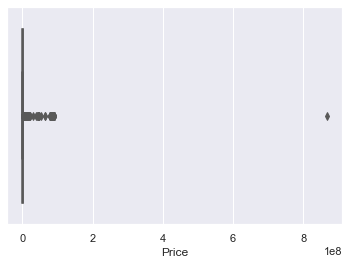

In [515]:
# Boxplot before removing outliers
sns.boxplot(df['Price'])

In [516]:
# Find the outliers of the Area column using IQR method:
Q1 = df['Price'].quantile(0.25)
Q3 = df['Price'].quantile(0.75)
IQR = Q3 - Q1
print(IQR)

246000.0


In [517]:
# Find the upper fence and lower fence values
Lower_Fence = Q1 - (1.5 * IQR)
Upper_Fence = Q3 + (1.5 * IQR)
print(Lower_Fence)
print(Upper_Fence)

-220000.0
764000.0


In [518]:
# Filter out the outlier data and print only the potential data by negating the preceding result:
df = df[~((df['Price'] < Lower_Fence) |(df['Price'] > Upper_Fence))]

<AxesSubplot:xlabel='Price'>

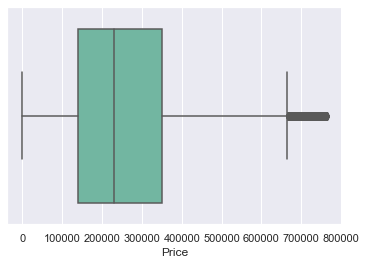

In [519]:
# Boxplot after removing outliers
sns.boxplot(df['Price'])

### Remove Outliers (Area)

<AxesSubplot:xlabel='Area'>

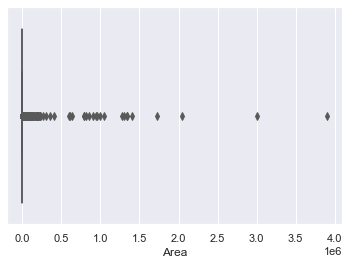

In [520]:
# Boxplot before removing outliers
sns.boxplot(df['Area'])

In [521]:
# Find the outliers of the Area column using IQR method:
Q1 = df['Area'].quantile(0.25)
Q3 = df['Area'].quantile(0.75)
IQR = Q3 - Q1
print(IQR)

94.0


In [522]:
# Find the upper fence and lower fence values
Lower_Fence = Q1 - (1.5 * IQR)
Upper_Fence = Q3 + (1.5 * IQR)
print(Lower_Fence)
print(Upper_Fence)

-54.0
322.0


In [523]:
# Filter out the outlier data and print only the potential data by negating the preceding result:
df = df[~((df['Area'] < Lower_Fence) |(df['Area'] > Upper_Fence))]

<AxesSubplot:xlabel='Area'>

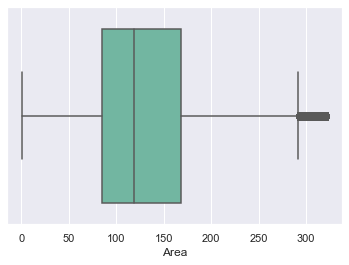

In [524]:
# Boxplot after removing outliers
sns.boxplot(df['Area'])

In [525]:
# New number of properties after removing outliers
df.shape

(103643, 7)

### Discretization/Bucketing of Price Label

In [526]:
#Bucket our property prices into 5 bins
df['Price Bucket']=pd.qcut(df['Price'],3,labels=['Low', 'Medium', 'High'])

df.head()

,District,Bedrooms,Bathrooms,Area,Condition,PropertyType,Price,Price Bucket
0,3,3,2,109.00000,1,0,330000.00000,High
1,3,2,2,90.00000,1,0,240000.00000,Medium
2,3,4,4,142.00000,1,0,450000.00000,High
3,3,0,1,39.22000,1,0,130000.00000,Low
4,3,2,1,103.00000,5,0,133900.00000,Low


### Remove Label Columns

In [527]:
#New dataframe without label, Price, for later clustering
features = ['District', 'Bedrooms', 'Bathrooms', 'Area', 'Condition', 'PropertyType']
df_properties = df[features]

df_properties.head()

,District,Bedrooms,Bathrooms,Area,Condition,PropertyType
0,3,3,2,109.00000,1,0
1,3,2,2,90.00000,1,0
2,3,4,4,142.00000,1,0
3,3,0,1,39.22000,1,0
4,3,2,1,103.00000,5,0


In [528]:
df.shape

(103643, 8)

In [529]:
df_properties.shape

(103643, 6)

### Identifying possible correlation between features

<AxesSubplot:>

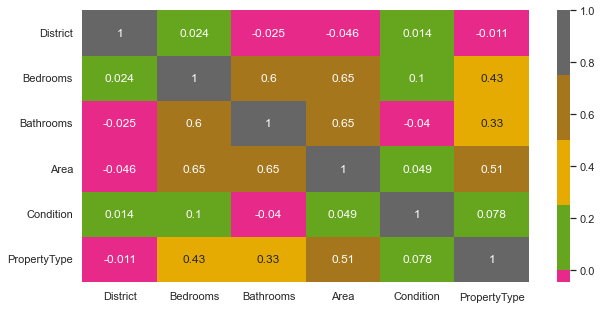

In [530]:
#Correlation matrix, District was weakly correlated but decided to keep
corrmat= df_properties.corr()
plt.figure(figsize=(10,5))  
sns.heatmap(corrmat,annot=True, cmap="Dark2", center=0)

### Data Scaling

In [531]:
#Scaling
scaler = StandardScaler()
scaler.fit(df_properties)
scaled_df = pd.DataFrame(scaler.transform(df_properties),columns= df_properties.columns )

<AxesSubplot:title={'center':'Data Set Distribution after StandardScaler'}, ylabel='Density'>

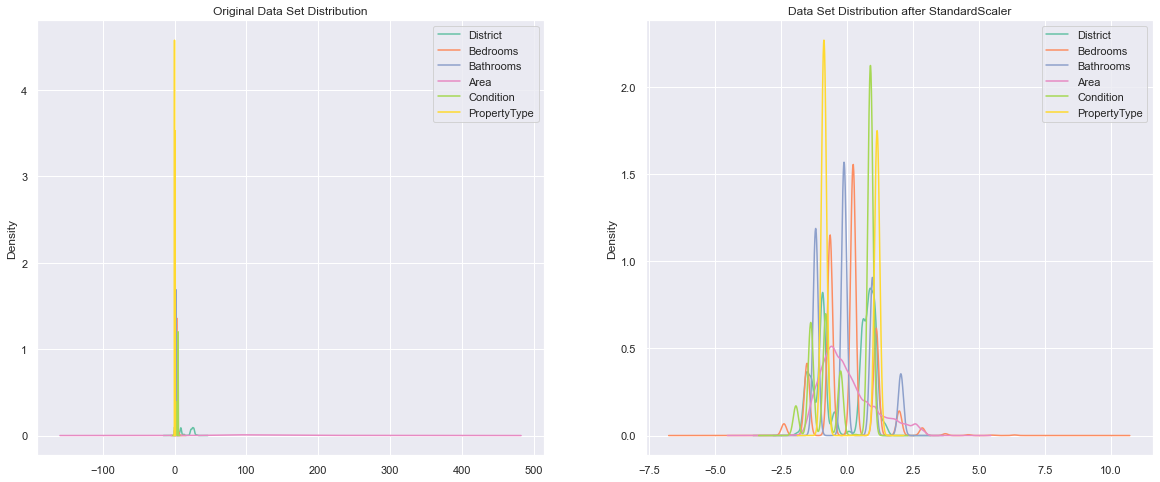

In [532]:
# Density plots before and after Min-Max Scaling
fig, (ax1, ax3) = plt.subplots(ncols=2, figsize=(20, 8))
ax1.set_title('Original Data Set Distribution')
df_properties.plot.density(ax=ax1)

ax3.set_title('Data Set Distribution after StandardScaler')
scaled_df.plot.density(ax=ax3)

### Dimensionality Reduction

In [533]:
#Applies PCA without reducing dimensionality, computes the cumulative explained variance ratio
pca = PCA().fit(scaled_df)

cumsum = np.cumsum(pca.explained_variance_ratio_)
cumsum

array([0.43508713, 0.60744302, 0.77235666, 0.88670769, 0.94974326,
       1.        ])

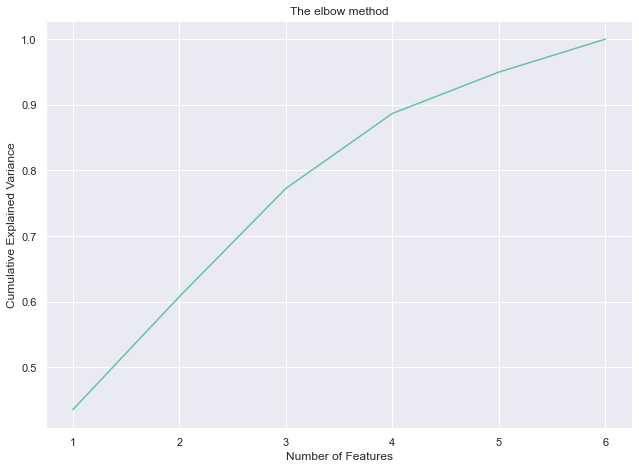

In [534]:
#Elbow Method to find optimal number of features to reduce to
plt.figure(figsize=(10.5, 7.5))
plt.plot(range(1, 7), cumsum)
plt.title('The elbow method')
plt.xlabel('Number of Features')
plt.ylabel('Cumulative Explained Variance')
plt.show()

In [535]:
#Initiating PCA to reduce dimensions (features) to 3 (elbow at either 3 or 4)
pca = PCA(n_components=4)
pca.fit(scaled_df)
PCA_df = pd.DataFrame(pca.transform(scaled_df), columns=(["col1","col2", "col3", "col4"]))
PCA_df.describe().T

,count,mean,std,min,25%,50%,75%,max
col1,103643.00000,-0.00000,1.61572,-3.29210,-1.16396,-0.29455,1.19728,6.41915
col2,103643.00000,0.00000,1.01693,-2.09798,-0.96461,-0.09370,0.71554,2.89439
col3,103643.00000,0.00000,0.99473,-2.31438,-0.81660,0.08764,0.71628,2.54660
col4,103643.00000,-0.00000,0.82832,-2.45976,-0.55136,0.07055,0.61689,3.00904


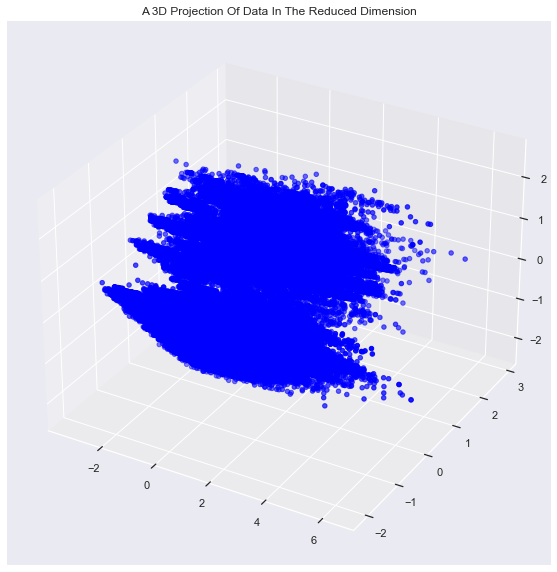

In [536]:
#A 3D Projection Of Data In The Reduced Dimension (3 of the 4 principal components)
x =PCA_df["col1"]
y =PCA_df["col2"]
z =PCA_df["col3"]
#To plot
fig = plt.figure(figsize=(12,10))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(x,y,z, c="blue", marker="o" )
ax.set_title("A 3D Projection Of Data In The Reduced Dimension")
plt.show()

In [537]:
#Finding the optimum number of clusters for mini-batch k-means classification
wcss = [] #within cluster sum of squares

for i in range(1, 11):
    #miniKMeans = MiniBatchKMeans(n_clusters=8, init='k-means++', max_iter=100, batch_size=1024, random_state=None, n_init=3)
    miniKMeans = MiniBatchKMeans(n_clusters = i, init='k-means++', max_iter=100, batch_size=1024, random_state=4, n_init=3)
    miniKMeans.fit(PCA_df)
    wcss.append(miniKMeans.inertia_)

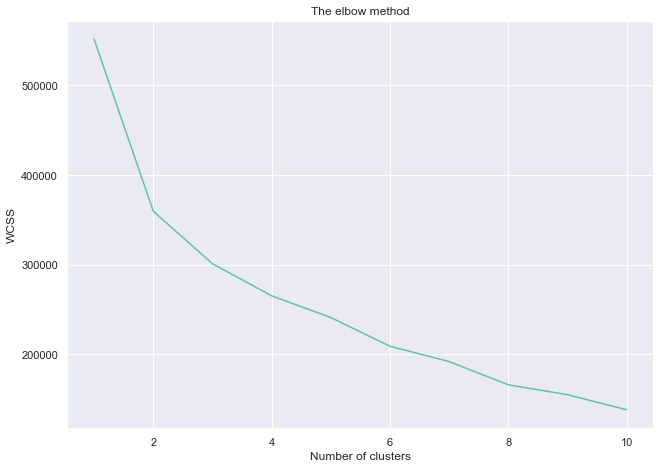

In [538]:
plt.figure(figsize=(10.5, 7.5))
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') #within cluster sum of squares
plt.show()

We will try 3 clusters.

## **Modeling**

In [539]:
miniKMeans = MiniBatchKMeans(n_clusters=3, init='k-means++', max_iter=100, batch_size=1024, random_state=4, n_init=3)
y_kmeans = miniKMeans.fit_predict(PCA_df)
PCA_df["Clusters"] = y_kmeans
#Adding the Clusters feature to the orignal dataframe.
df["Clusters"]= y_kmeans

In [540]:
df.head()

,District,Bedrooms,Bathrooms,Area,Condition,PropertyType,Price,Price Bucket,Clusters
0,3,3,2,109.00000,1,0,330000.00000,High,1
1,3,2,2,90.00000,1,0,240000.00000,Medium,1
2,3,4,4,142.00000,1,0,450000.00000,High,0
3,3,0,1,39.22000,1,0,130000.00000,Low,1
4,3,2,1,103.00000,5,0,133900.00000,Low,1


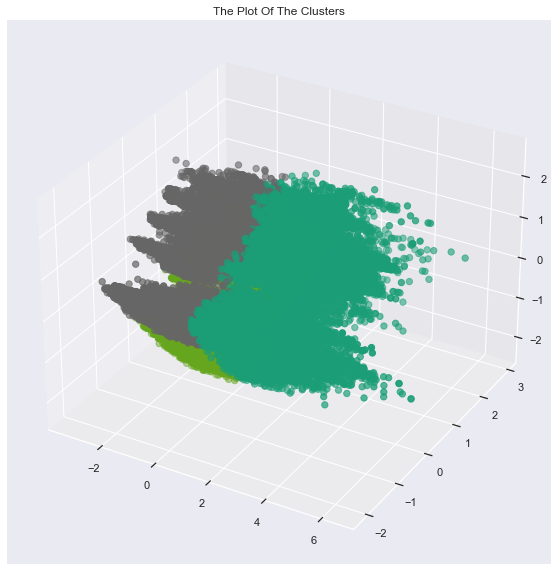

In [541]:
#Plotting the clusters
fig = plt.figure(figsize=(12,10))
ax = plt.subplot(111, projection='3d', label="bla")
ax.scatter(x, y, z, s=40, c=PCA_df["Clusters"], marker='o', cmap = "Dark2" )
ax.set_title("The Plot Of The Clusters")
plt.show()

## **Model Evaluation**

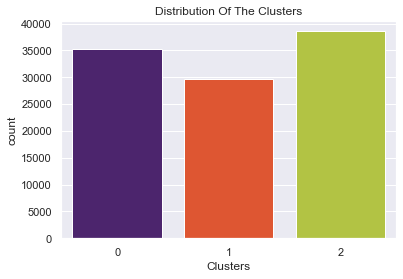

In [542]:
#Plotting countplot of clusters
pal = ["#4D1979", "#FA4616", "#C1D82F"]
pl = sns.countplot(x=df["Clusters"], palette= pal)
pl.set_title("Distribution Of The Clusters")
plt.show()

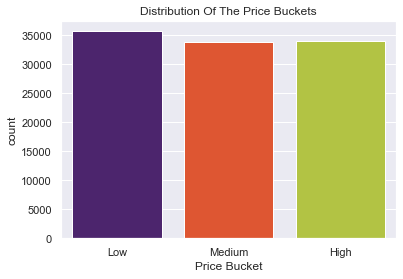

In [543]:
#Plotting countplot of price bucket label
pl = sns.countplot(x=df["Price Bucket"], palette= pal)
pl.set_title("Distribution Of The Price Buckets")
plt.show()

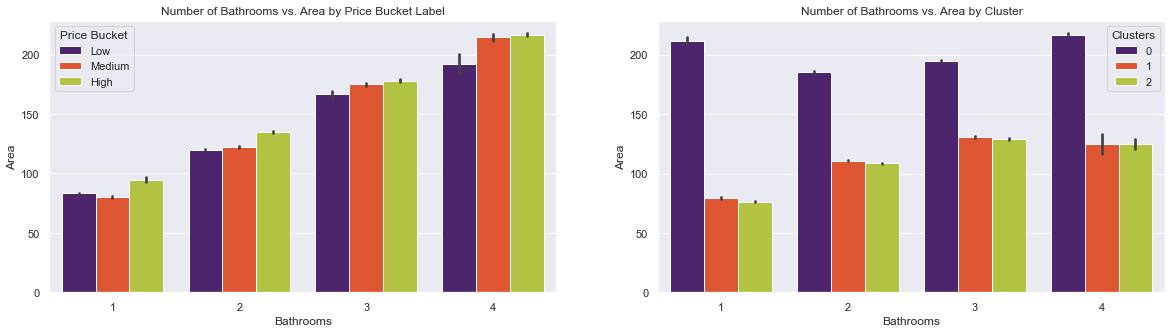

In [544]:
# Comparison of Bathrooms vs. Area Bar Plots
fig, (ax1, ax3) = plt.subplots(ncols=2, figsize=(20, 5))
ax1.set_title('Number of Bathrooms vs. Area by Price Bucket Label')
pl = sns.barplot(data = df,x=df["Bathrooms"], y=df["Area"],hue=df["Price Bucket"], palette= pal, ax=ax1)
ax3.set_title("Number of Bathrooms vs. Area by Cluster")
pl = sns.barplot(data = df,x=df["Bathrooms"], y=df["Area"],hue=df["Clusters"], palette= pal, ax=ax3)

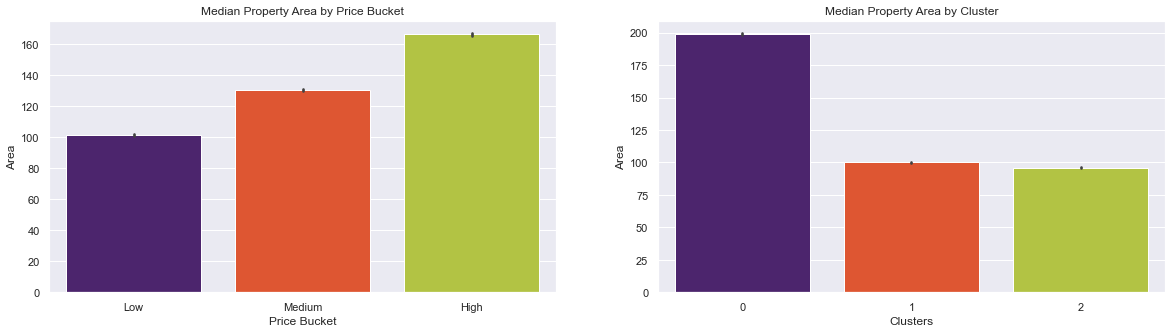

In [545]:
# Comparison of Property Area by Price Bucket, Property Area by Cluster Bar Plots
fig, (ax1, ax3) = plt.subplots(ncols=2, figsize=(20, 5))
ax1.set_title("Median Property Area by Price Bucket")
pl = sns.barplot(data = df,x=df["Price Bucket"], y=df["Area"], palette= pal, ax=ax1)

ax3.set_title("Median Property Area by Cluster")
pl = sns.barplot(data = df,x=df["Clusters"], y=df["Area"], palette= pal, ax=ax3)

<AxesSubplot:title={'center':'Property Area by Cluster'}, xlabel='Clusters', ylabel='Area'>

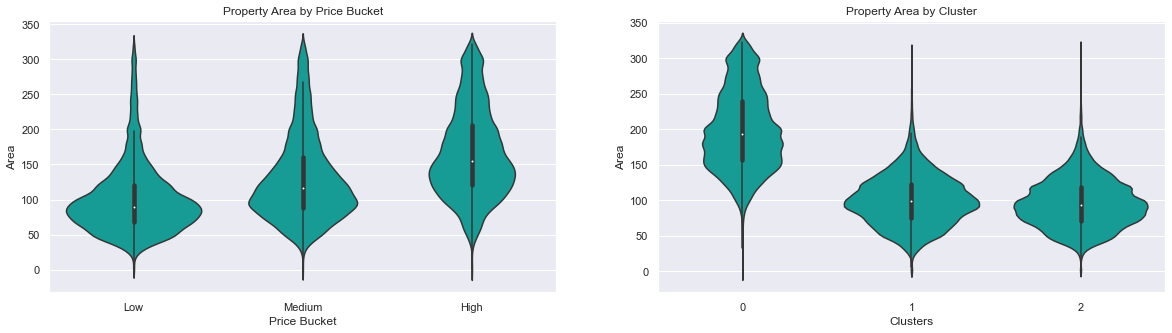

In [546]:
# Comparison of Property Area by Price Bucket, Property Area by Cluster Violin Plots
# Cluster 0 could correspond to Price Bucket "High", etc.
fig, (ax1, ax3) = plt.subplots(ncols=2, figsize=(20, 5))
ax1.set_title("Property Area by Price Bucket")
sns.violinplot(x=df["Price Bucket"], y=df["Area"], color= "#00B2A9", ax=ax1)

ax3.set_title("Property Area by Cluster")
sns.violinplot(x=df["Clusters"], y=df["Area"], color= "#00B2A9", ax=ax3)

[[Text(0, 0, 'Apartment'), Text(1, 0, 'House')]]

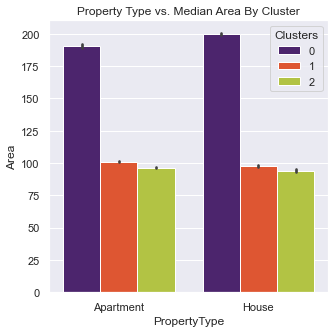

In [547]:
#Property Type vs. Median Area by Cluster, median areas per cluster are similar regardless of property type
#Cluster 0 has a much higher median area than other 2 clusters
fig, ax = plt.subplots(figsize=(5, 5))
g = sns.barplot(x=df["PropertyType"], y=df["Area"], hue=df['Clusters'], palette=pal)
g.set_title("Property Type vs. Median Area By Cluster")
g.set(xticklabels=["Apartment", "House"])

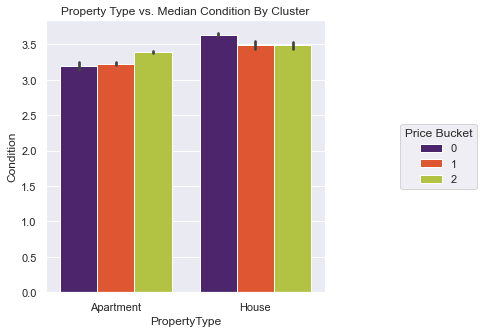

In [548]:
#Property Type vs. Condition by Cluster, Condition not much of a factor
#Condition between 3.0-3.5 regardless of property type, and regardless of cluster
fig, ax = plt.subplots(figsize=(5, 5))
g = sns.barplot(x=df["PropertyType"], y=df["Condition"], hue=df['Clusters'], palette=pal)
g.set(xticklabels=["Apartment", "House"])
g.set_title("Property Type vs. Median Condition By Cluster")
g.legend(title='Price Bucket', loc='center left', bbox_to_anchor=(1.25, 0.5), ncol=1)

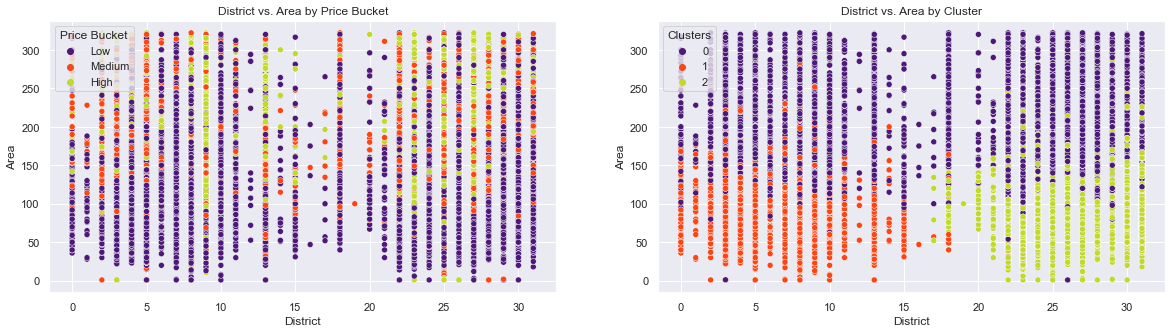

In [549]:
# Comparison of District vs. Area plots, clear cluster boundaries in second plot
fig, (ax1, ax3) = plt.subplots(ncols=2, figsize=(20, 5))
ax1.set_title("District vs. Area by Price Bucket")
pl = sns.scatterplot(x=df["District"], y=df['Area'], hue=df['Price Bucket'], palette= pal, ax=ax1)
pl.legend(title='Price Bucket', loc='upper left', ncol=1)

ax3.set_title("District vs. Area by Cluster")
pl = sns.scatterplot(x=df["District"], y=df['Area'], hue=df['Clusters'], palette= pal, ax=ax3)
pl.legend(title='Clusters', loc='upper left', ncol=1)

<AxesSubplot:>

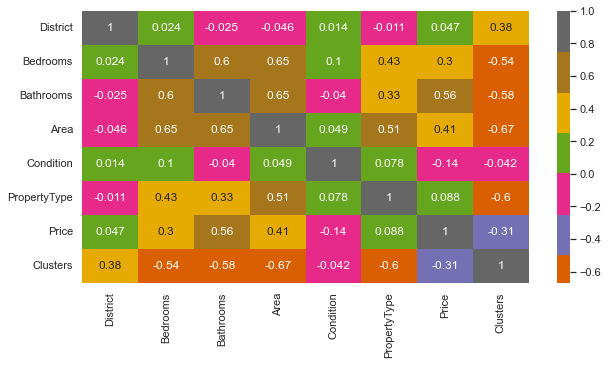

In [550]:
#Correlation matrix showing inverse relationships for price and clusters
corrmat= df.corr()
plt.figure(figsize=(10,5))  
sns.heatmap(corrmat,annot=True, cmap="Dark2", center=0)